# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Read DataFrame

In [2]:
df=pd.read_csv("Global+Superstore+Data.csv")

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
df.shape

(51290, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [7]:
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [8]:
df.nunique().sort_values()

Segment           3
Market            7
Order Date     1430
Sales         22995
Profit        24575
dtype: int64

## Data Manipulation

In [9]:

df["Market-Segment"]=df["Market"]+ '-' + df["Segment"]

In [10]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [11]:
df.nunique().sort_values()

Segment               3
Market                7
Market-Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

-- 7 different geographical market segments 
-- 3 major customer segments
-- 21 unique Market-Segments

In [12]:
import warnings
warnings.filterwarnings('ignore')

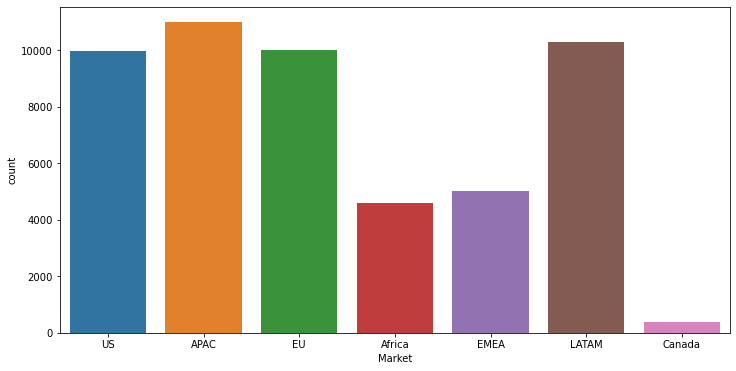

In [13]:
plt.figure(figsize=[12,6])
sns.countplot(df["Market"])
plt.show()

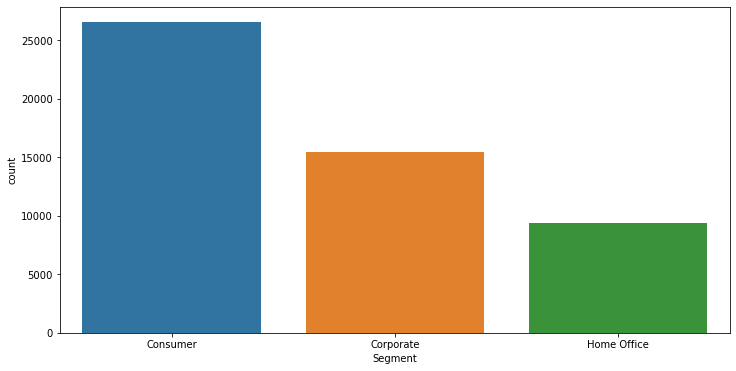

In [14]:
plt.figure(figsize=[12,6])
sns.countplot(df["Segment"])
plt.show()

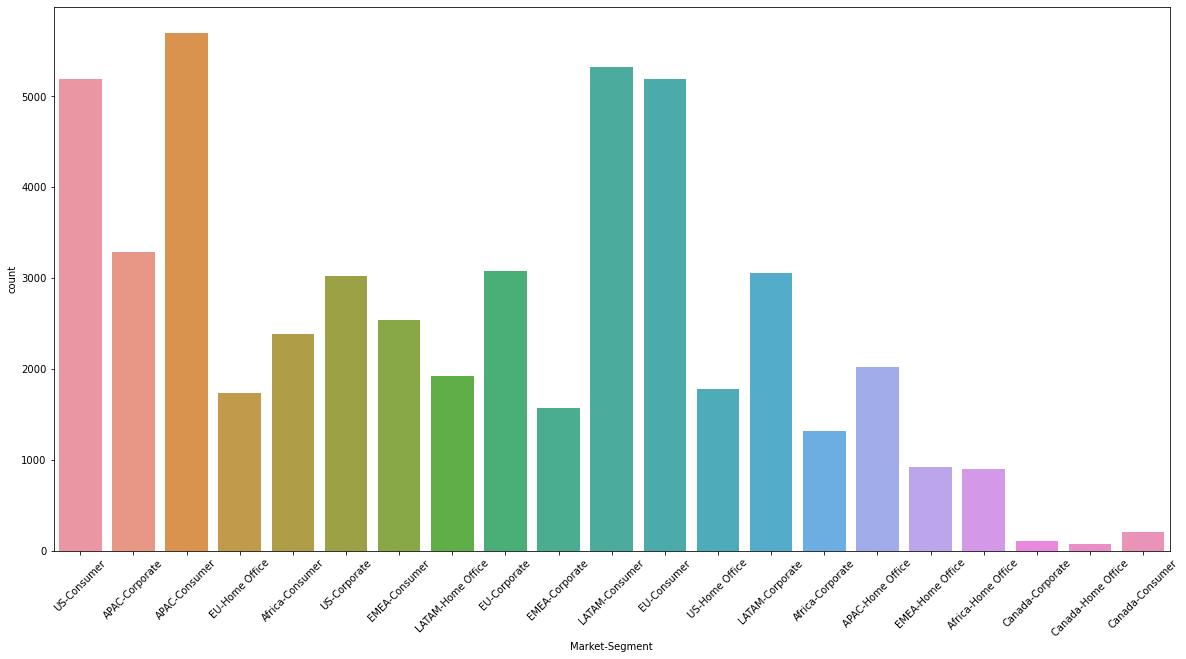

In [15]:
plt.figure(figsize=[20,10])
sns.countplot(df["Market-Segment"])
plt.xticks(rotation=45)
plt.show()

-- APAC-Consumer has the highest count


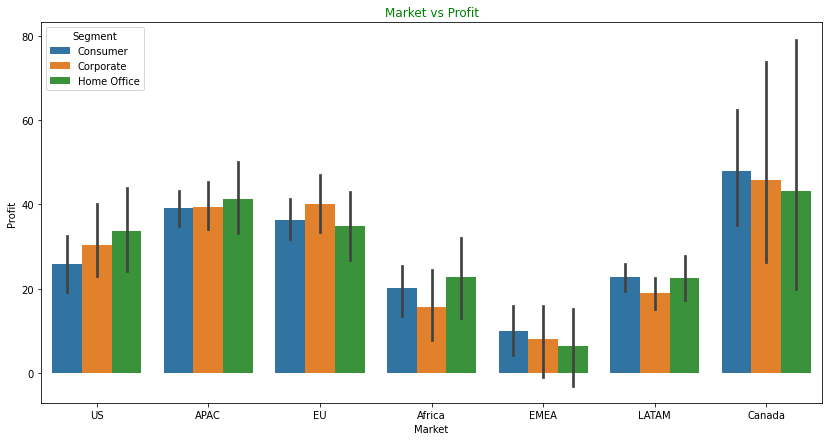

In [16]:
plt.figure(figsize=(14,7))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=df)
plt.title('Market vs Profit', color="Green")
plt.show()

-- Canada and APAC markets with the segments Consumer, Corporate and Home office have more profit

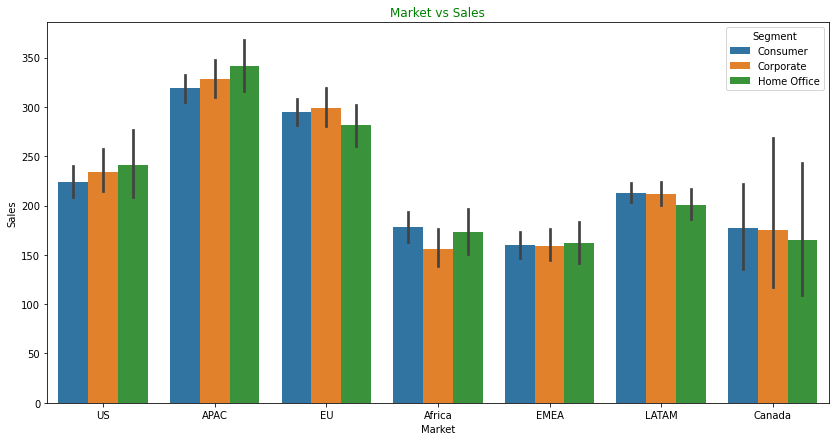

In [17]:
plt.figure(figsize=(14,7))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=df)
plt.title('Market vs Sales', color="Green")
plt.show()

-- APAC market is having higher Sales in all the three segments

In [18]:
# to convert datetime in month format

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y').dt.to_period('m')

In [20]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [21]:
#drop segment and market columns

In [22]:
df.drop(["Segment","Market"],axis=1,inplace=True)

In [23]:
df.head()

,Order Date,Sales,Profit,Market-Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-02,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-11,2832.960,311.5200,Africa-Consumer


In [24]:
# create pivot table around order date and market segment in hue of profit

In [25]:
df_pivot=df.pivot_table(index='Order Date',values='Profit',columns='Market-Segment',aggfunc='sum')

In [26]:
df_pivot

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


# Train-Test Split

In [27]:
train_len=42
train=df_pivot[:train_len]
test=df_pivot[train_len:]

In [28]:
train.shape

(42, 21)

In [29]:
train.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [30]:
test.shape

(6, 21)

### Calculate Covariance on each Market- Segment

In [31]:
Cov_df=pd.DataFrame(columns=["Market-Segment","Covariance"])

In [32]:
for i in df_pivot.columns:
    var = {"Market-Segment": i, "Covariance": np.std(train[i])/np.mean(train[i])}
    Cov_df = Cov_df.append(var, ignore_index=True)

In [33]:
Cov_df.sort_values(by="Covariance")

,Market-Segment,Covariance
0,APAC-Consumer,0.596404
12,EU-Consumer,0.647485
15,LATAM-Consumer,0.680684
13,EU-Corporate,0.689346
1,APAC-Corporate,0.731926
16,LATAM-Corporate,0.880260
19,US-Corporate,1.027209
2,APAC-Home Office,1.048817
18,US-Consumer,1.095295
14,EU-Home Office,1.114681


In [34]:
Cov_df[Cov_df["Covariance"]==Cov_df["Covariance"].min()]

,Market-Segment,Covariance
0,APAC-Consumer,0.596404


#so minimum covariance is for market segment -> APAC-Consumer

#hence Apac-Consumer is the most stable market segment

### so we will be doing a forecast on APAC-Consumer

In [35]:
df_new=df[df['Market-Segment']=='APAC-Consumer']

In [36]:
df_new

,Order Date,Sales,Profit,Market-Segment
2,2013-10,5175.1710,919.9710,APAC-Consumer
6,2011-11,1822.0800,564.8400,APAC-Consumer
7,2012-04,5244.8400,996.4800,APAC-Consumer
14,2013-06,3701.5200,1036.0800,APAC-Consumer
29,2012-02,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...
51215,2013-01,38.9709,-32.3991,APAC-Consumer
51234,2014-11,6.9000,-0.8400,APAC-Consumer
51235,2011-11,17.2800,-13.9200,APAC-Consumer
51236,2013-07,30.6180,1.0080,APAC-Consumer


In [37]:
# since WE ARE FORECASTING ON APAC CONSUMER WE CAN DROP MARKET SEGMENT COLUMN AND SET INDEX TO ORDER DATE

In [38]:
df_new.drop('Market-Segment',axis=1,inplace=True)
df_new.set_index("Order Date")

,Sales,Profit
Order Date,,
2013-10,5175.1710,919.9710
2011-11,1822.0800,564.8400
2012-04,5244.8400,996.4800
2013-06,3701.5200,1036.0800
2012-02,1878.7200,582.3600
...,...,...
2013-01,38.9709,-32.3991
2014-11,6.9000,-0.8400
2011-11,17.2800,-13.9200


In [39]:
df2=df_new.groupby("Order Date").sum()

In [40]:
df2

,Sales,Profit
Order Date,,
2011-01,15711.7125,991.2825
2011-02,12910.8588,1338.8688
2011-03,19472.5632,3747.1632
2011-04,15440.3046,3846.4746
2011-05,24348.9723,3639.9423
2011-06,27260.0196,4328.2596
2011-07,15842.8317,1258.9617
2011-08,22012.2366,775.8066
2011-09,34613.1849,5181.4449


In [41]:
df2.shape

(48, 2)

In [42]:
## Plotting the Data

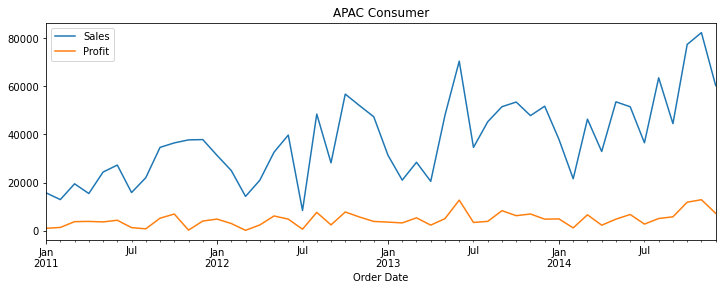

In [43]:
df2.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer')
plt.show()

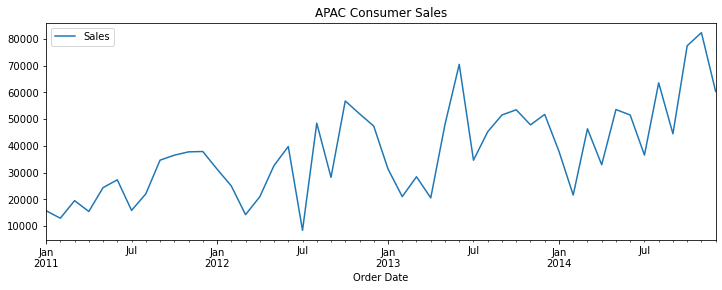

In [44]:
df2.Sales.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer Sales')
plt.show()

### Time series Decomposition

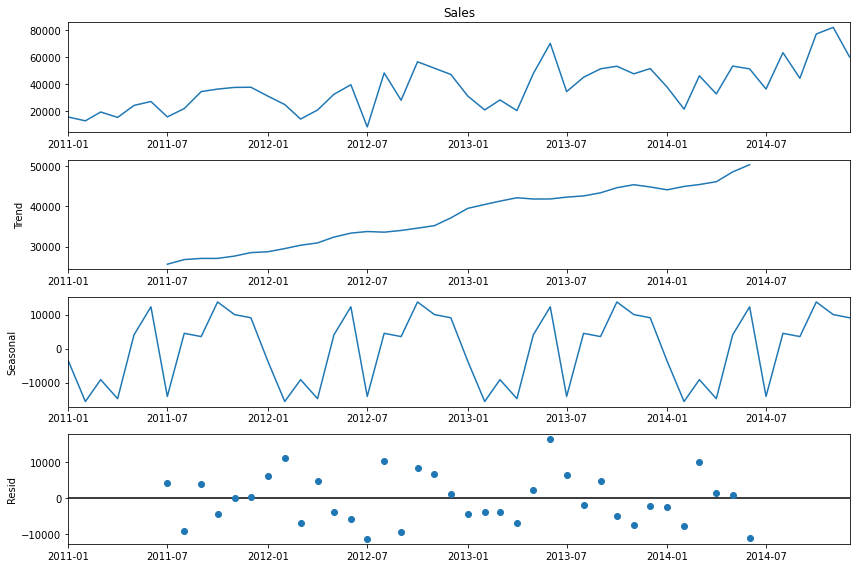

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose
df2.Sales.interpolate(inplace = True)
df2.Sales.index=df2.Sales.index.to_timestamp()
decomposition = seasonal_decompose(df2.Sales)
fig = decomposition.plot()
plt.show()

In [46]:
df2 = df2.to_timestamp() 

## Train -Test split

In [47]:
train_len=42
train=df2[:train_len]# first 42 months training set
test=df2[train_len:]# next 6 month test set

In [48]:
train.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


In [49]:
train.shape

(42, 2)

In [50]:
test.shape

(6, 2)

## Building Forecasting models


### 1.Naive method


In [51]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train test and forecast

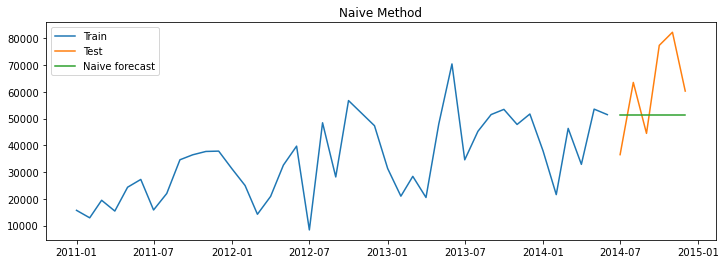

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [53]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### 2.Simple Average Method

In [54]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train test and forecast

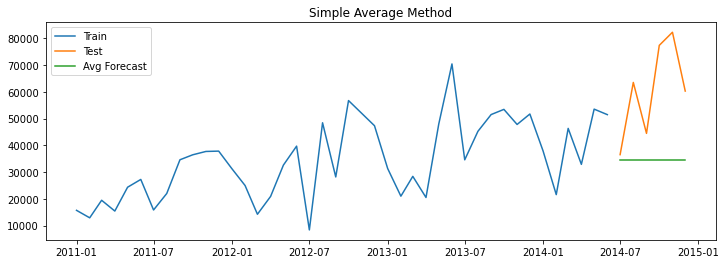

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [56]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


### 3.Simple Moving Average method

In [57]:
y_hat_sma = df2.copy()
ma_window = 4
y_hat_sma['sma_forecast'] = df2['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train test and forecast


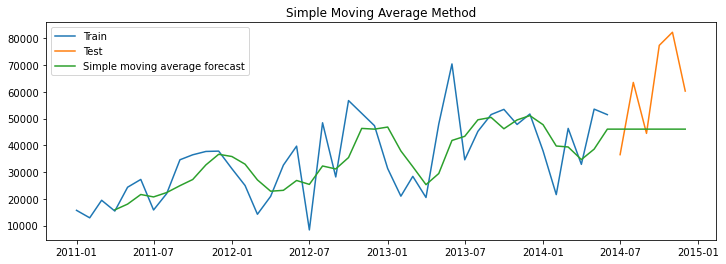

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [59]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54


### 4.simple exponential method

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train test and forecast

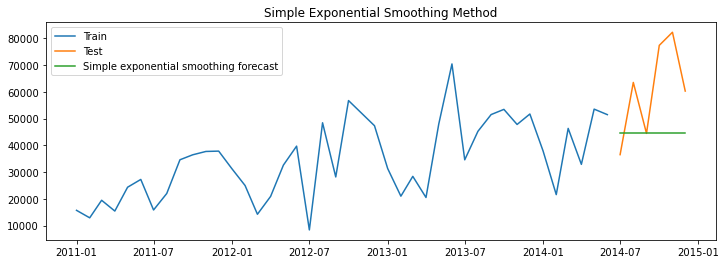

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [62]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70


### 5.Holts method with trend

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.712500000003, 'initial_trend': -2800.8537000000033, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train test and forecast

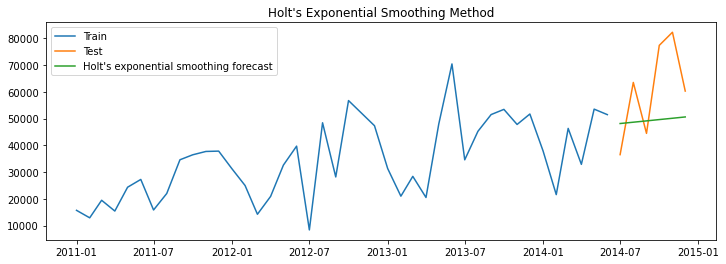

In [64]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [65]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12


### 6.Holt Winters' additive method with trend and seasonality

In [66]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.291900000004, 'initial_trend': 730.4167145833345, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train test and forecast

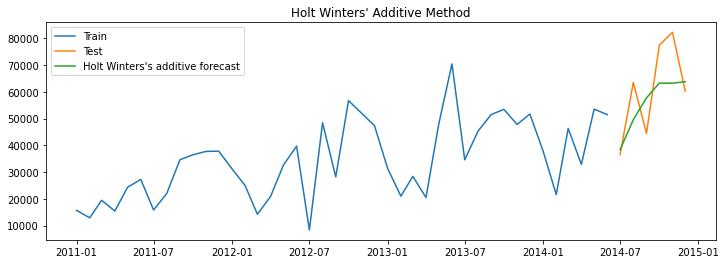

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [68]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32


### Holt Winter's multiplicative method with trend and seasonality

In [69]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.291900000004, 'initial_trend': 730.4167145833345, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train test and forecast

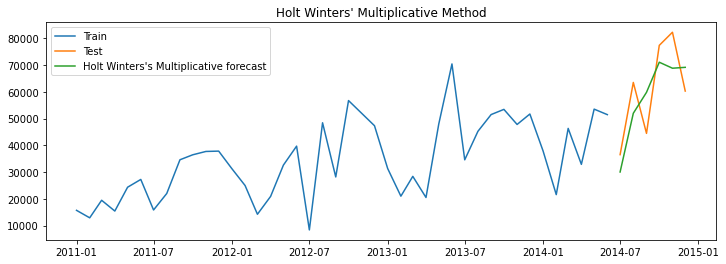

In [70]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s Multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27


## Auto Regression Models

### Stationarity test

In [72]:
# KPSS Test

In [73]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df2['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


The p-value is less than 0.05 ,hence we reject the null hypothesis.

### Box Cox transformation to make variance constant

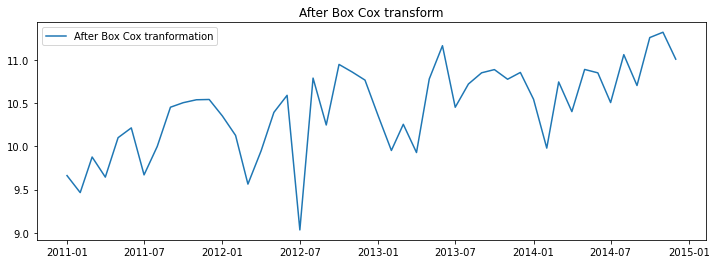

In [74]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df2['Sales'], lmbda=0), index = df2.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

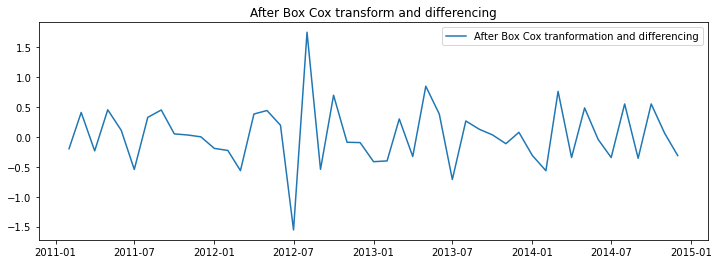

In [75]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df2.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [76]:
data_boxcox_diff.dropna(inplace=True)

In [77]:
## KPSS TEST

In [78]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


The p-value is greater than 0.05 ,hence we fail to reject the null hypothesis.

### Auto Correlation Function

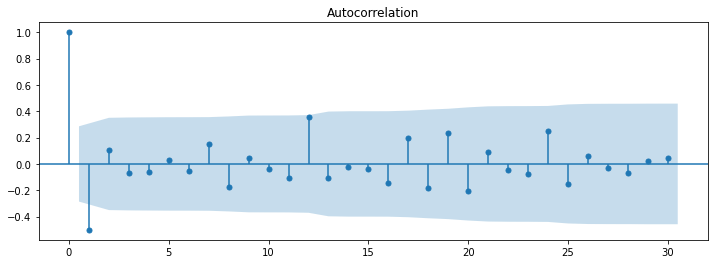

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#### Train test split after boxcox and differencing

In [80]:

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regressive Models (AR)

In [81]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover original time series

In [82]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train test and forecast

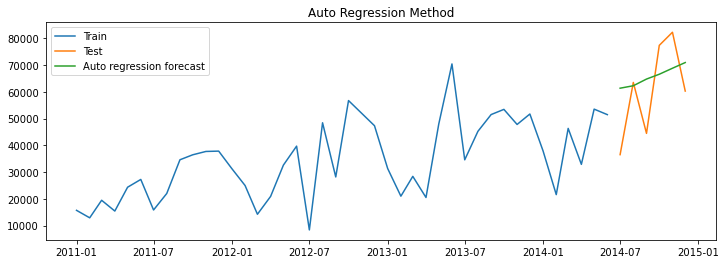

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculating RMSE and MAPE

In [84]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27


## Moving Average Model (MA)

In [85]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [86]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train test and forecast

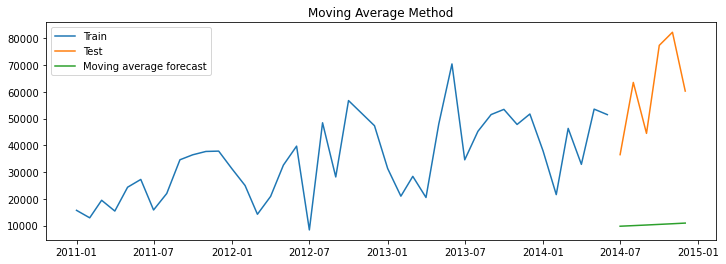

In [87]:
plt.figure(figsize=(12,4))
plt.plot(df2['Sales'][:train_len], label='Train')
plt.plot(df2['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


## ARMA Model

In [89]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115921
ma.L1.y   -0.999970
dtype: float64


### Recover original time series

In [90]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train test and forecast

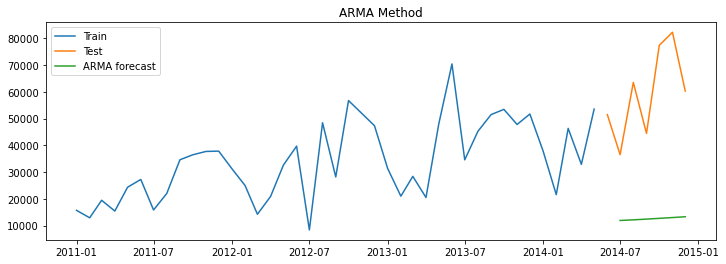

In [91]:
plt.figure(figsize=(12,4))
plt.plot(df2['Sales'][:train_len-1], label='Train')
plt.plot(df2['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [92]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.76,77.66


## ARIMA Model

In [93]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115921
ma.L1.D.y   -0.999970
dtype: float64


### Recover original time series

In [94]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train test and forecast

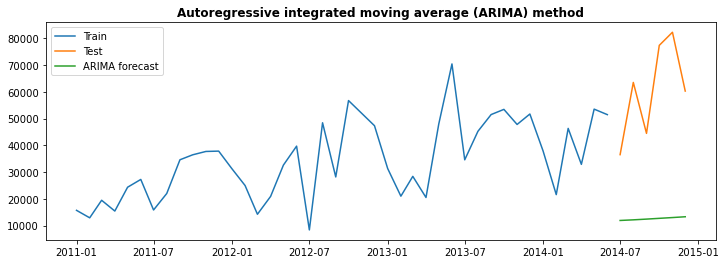

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [96]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.76,77.66


## SARIMA Model

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100388
ma.L1      -0.995496
ar.S.L12   -0.394854
ma.S.L12   -0.989135
sigma2      0.047205
dtype: float64


### Recover original time series

In [98]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train test and forecast

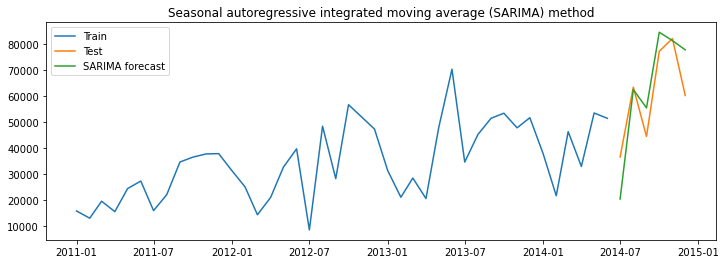

In [99]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [100]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,21958.41,27.54
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.76,77.66


# Conclusion:

### 1.Holt Winters additive method is the best forecasting method in the smoothing technique

### 2.SARIMA - Seasonal Autoregressive Integrated moving average is the best method in ARIMA set of techniques.
